In [29]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import random

In [30]:
#make_blobs?

In [31]:
X,y=make_blobs(n_samples=100,n_features=2,centers=5,random_state=42)

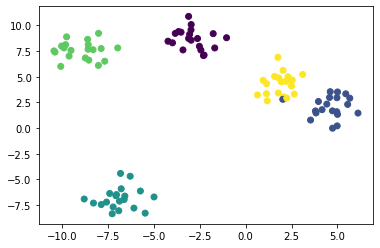

In [32]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [33]:
from sklearn.cluster  import KMeans

In [34]:
Model=KMeans(5)

In [35]:
Model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [36]:
Model.labels_

array([2, 4, 3, 4, 0, 2, 1, 1, 1, 3, 3, 2, 4, 3, 1, 0, 4, 4, 2, 0, 0, 1,
       3, 2, 0, 0, 4, 4, 4, 1, 2, 0, 4, 4, 4, 0, 3, 3, 3, 1, 2, 1, 1, 1,
       0, 3, 3, 2, 0, 4, 4, 1, 1, 2, 1, 0, 4, 4, 3, 3, 1, 3, 0, 2, 0, 2,
       4, 4, 2, 4, 0, 2, 2, 2, 4, 0, 1, 0, 4, 2, 4, 2, 0, 1, 0, 3, 0, 3,
       3, 3, 0, 3, 2, 1, 2, 3, 2, 3, 1, 1])

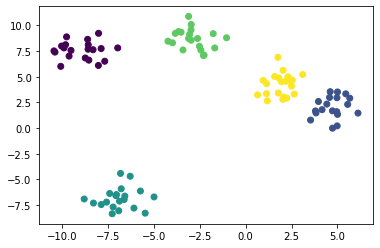

In [37]:
plt.scatter(X[:,0],X[:,1],c=Model.labels_)

# for cluster in Model.cluster_centers_:
#     plt.scatter(cluster[0],cluster[1],s=100)



plt.show()



In [38]:
# plt.scatter(X[:,0],X[:,1],c=("red","black","green","blue","blue"])

In [39]:
colors=["black","blue","green","yellow","red"]

In [40]:
clr=[colors[item] for item in Model.labels_]

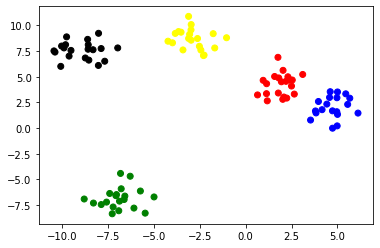

In [41]:
plt.scatter(X[:,0],X[:,1],c=clr)
plt.show()

In [ ]:
# from sklearn.cluster import KMeans

# model = KMeans(5)

# model.fit(X)

# model.labels_

# plt.scatter(X[:, 0], X[:, 1], c=model.labels_)

# # for cluster in model.cluster_centers_:
# #     plt.scatter(cluster[0], cluster[1], s=100)

# colors = ["red", "green", "blue", "yellow", "black"]

# clr = [colors[item] for item in model.labels_]

# plt.scatter(X[:, 0], X[:, 1], c=clr)

In [42]:
class Cluster:
    
    def __init__(self, name, center):
        self.name = name
        self.center = center
        self.points = []
        
    def relocate(self):
        self.center = np.mean(self.points, axis=0)
        self.points.clear()
    
    def distance(self, point):
        return np.sqrt(((self.center - point) ** 2).sum())

In [43]:

class KMeansCustom:
    
    def __init__(self, n_clusters=8): 
        self.n_clusters = n_clusters
        
    def fit(self, X):
        
        # create n clusters
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(i, random.choice(X))
            clusters.append(cluster)
        
        errors = []
        # repeat max_iter times
        for i in range(10):
            
            labels = []
            # get a vote from every point
            for point in X:
                list_dist = []
                # point voting for clusters
                for cluster in clusters:
                    distance = cluster.distance(point)
                    list_dist.append((distance, cluster.name))
                    
                # selected clusted decided
                sel_dist, sel_cluster_name = sorted(list_dist)[0]
                sel_cluster = clusters[sel_cluster_name]
                sel_cluster.points.append(point)
                labels.append(sel_cluster_name)
            
            # readjust the centers
            for cluster in clusters:
                cluster.relocate()
                
            errors.append(self.error(clusters, labels, X))
                
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        self.labels_ = labels
        
        return errors
        
    def error(self, clusters, labels, X):
        
        err = 0
        for point, label in zip(X, labels):
            err += clusters[label].distance(point)
            
        return err / len(X)
      

In [51]:
model=KMeansCustom(4)


In [52]:
errors=model.fit(X)

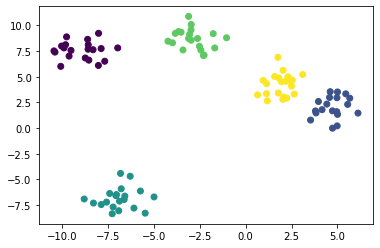

In [53]:
plt.scatter(X[:,0],X[:,1],c=Model.labels_)
plt.show()

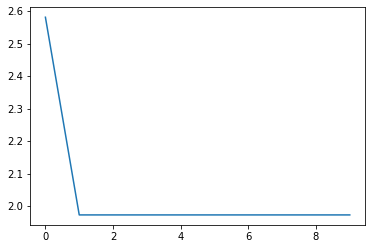

In [54]:
plt.plot(errors)